# Plot r values of each signature against RRM2B as a boxplot

In [1]:
import numpy as np # scientific computing
import pandas as pd # data loading and processing
import os # os operations
import matplotlib.pyplot as plt # for generating figures
import math
import matplotlib.dates as mdates
import seaborn as sns # for generating visualizations, better support with pandas than matplotlib
from scipy import stats
from sklearn.impute import SimpleImputer

from analysis import *

In [24]:
df = pd.read_csv('/Users/shanghongsim/Documents/GitHub/HU-ATRi-Code-Repository/results/antioxidant network screen/r values signature screen.csv', index_col = 0)
df.drop(['AOS'], inplace=True, axis=1)
print(df.head())
df1 = pd.melt(df, id_vars=['database'], value_vars=['HIF1A','HSF1','NFkB','TP53','NRF2','AP1','FOXO','PGC1A'])

<AxesSubplot:xlabel='variable', ylabel='value'>

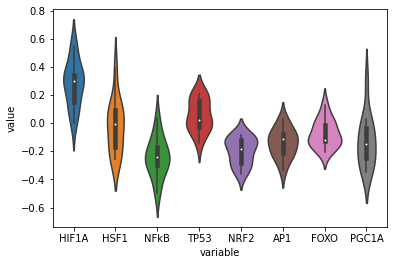

In [21]:
sns.violinplot(data=df1, x='variable', y='value')

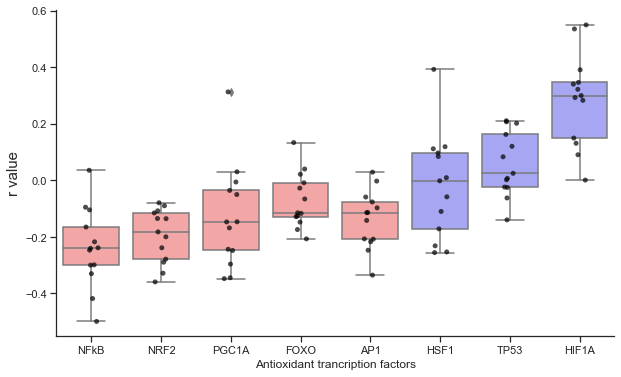

In [59]:
# rearrange columns in order of median value
sorted_index = df.median().sort_values().index
df_sorted=df[sorted_index]
df1_sorted = pd.melt(df_sorted, value_vars=['NFkB', 'NRF2', 'PGC1A', 'FOXO', 'AP1', 'HSF1', 'TP53', 'HIF1A'])

lightred = '#FF9999'
lightblue = '#9999FF'
my_pal = {'NFkB':lightred, 'NRF2':lightred, 'PGC1A':lightred, 'FOXO':lightred, 'AP1':lightred, 'HSF1':lightblue, 'TP53':lightblue, 'HIF1A':lightblue}

sns.set(rc = {'figure.figsize':(10,6)})
sns.set_style(style='ticks')
bplot = sns.boxplot(data=df1_sorted, x='variable', y='value', palette=my_pal)
sns.stripplot(data=df1_sorted, x='variable', y='value', color='black', alpha=0.7)
plt.xlabel("Antioxidant trancription factors", size=12)
plt.ylabel("r value", size=15)
sns.despine()

plt.show()